In [2]:
import warnings 
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.python.keras.models import load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from scipy.stats import skew

### Calculate the class perplexity of validation data

In [3]:
val_perp = pd.read_csv('perp_data/perplexity.csv')
label_avg_x_perp = val_perp.groupby('label')['x_perplexity'].mean().sort_values()

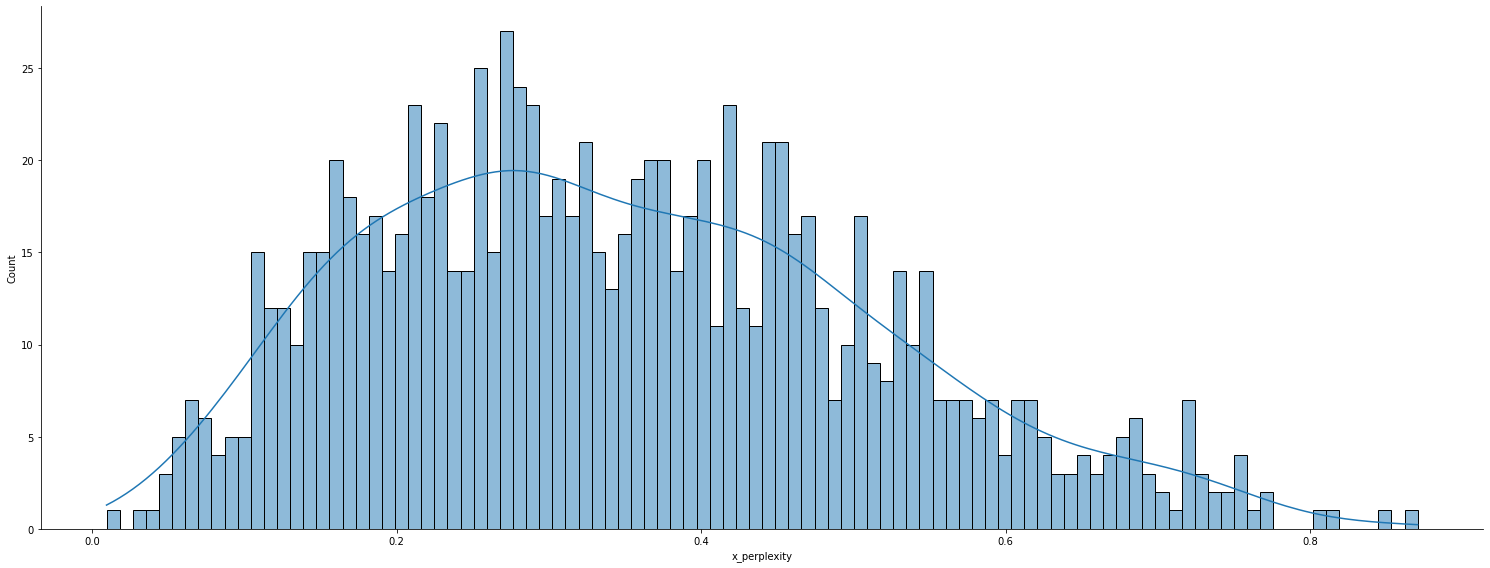

In [4]:
sns.displot(label_avg_x_perp,kde=True,height=8,aspect=2.6,bins=100)
plt.savefig('img/label_xperp_dist.png',dpi=400)

In [23]:
label_avg_x_perp[949:999].mean()

0.7123447999999999

In [24]:
id_label_map = pd.read_csv('data/id_label_map.csv')

easy = label_avg_x_perp.index[30:80] #0.11
mid = label_avg_x_perp.index[650:700] #0.42
hard = label_avg_x_perp.index[949:999] #0.71

# easy_label = id_label_map[id_label_map['Nums']==easy]['Label'].values[0]
# mid_label = id_label_map[id_label_map['Nums']==mid]['Label'].values[0]
# hard_label = id_label_map[id_label_map['Nums']==hard]['Label'].values[0]

# print("Easy Label:{}, Mid-level Label:{}, Hard Label:{}".format(easy_label,mid_label,hard_label))
# print(label_avg_x_perp[433],label_avg_x_perp[811],label_avg_x_perp[972])

### Predict on given label on VAL I

define variables

In [37]:
easy_acc,mid_acc,hard_acc = [],[],[]

easy_img,mid_img,hard_img = [],[],[]

easy_label,mid_label,hard_label = [],[],[]

for e in easy:
    for i in os.listdir('val/'+e):
        if '.ipynb' not in i:
            easy_img.append(np.array([img_to_array(load_img(
                                'val/'+e+'/'+i, color_mode="rgb", target_size=(224,224)
                            ))])/255)
            easy_label.append(e)
for m in mid:
    for i in os.listdir('val/'+m):
        if '.ipynb' not in i:
            mid_img.append(np.array([img_to_array(load_img(
                                'val/'+m+'/'+i, color_mode="rgb", target_size=(224,224)
                            ))])/255)
            mid_label.append(m)
for h in hard:  
    for i in os.listdir('val/'+h):
        if '.ipynb' not in i:
            hard_img.append(np.array([img_to_array(load_img(
                                'val/'+h+'/'+i, color_mode="rgb", target_size=(224,224)
                            ))])/255)
            hard_label.append(h)

In [38]:
model_path = 'Final_Model/'
folder_path = ['Baseline',
 'Pruned95',
 'Pruned90',
 'Pruned85',
 'TVL',
 'C_weight',
 'X_weight']

for i in range(7):
    model = load_model('Final_Model/'+folder_path[i]+'/'+os.listdir(model_path+folder_path[i])[0])
    
    true_pred = 0
    counter = 0
    for img in easy_img:
        pred = np.argmax(model.predict(img))
        label = id_label_map[id_label_map['ID'] == pred]['Nums'][pred]
        if label == easy_label[counter]:
            true_pred += 1
        counter += 1
    easy_acc.append(true_pred / len(easy_img))
    
    true_pred = 0
    counter = 0
    for img in mid_img:
        pred = np.argmax(model.predict(img))
        label = id_label_map[id_label_map['ID'] == pred]['Nums'][pred]
        if label == mid_label[counter]:
            true_pred += 1
        counter += 1
    mid_acc.append(true_pred / len(mid_img))

    true_pred = 0
    counter = 0
    for img in hard_img:

        pred = np.argmax(model.predict(img))
        label = id_label_map[id_label_map['ID'] == pred]['Nums'][pred]
        if label == hard_label[counter]:
            true_pred += 1
        counter += 1
    hard_acc.append(true_pred / len(hard_img))
    

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


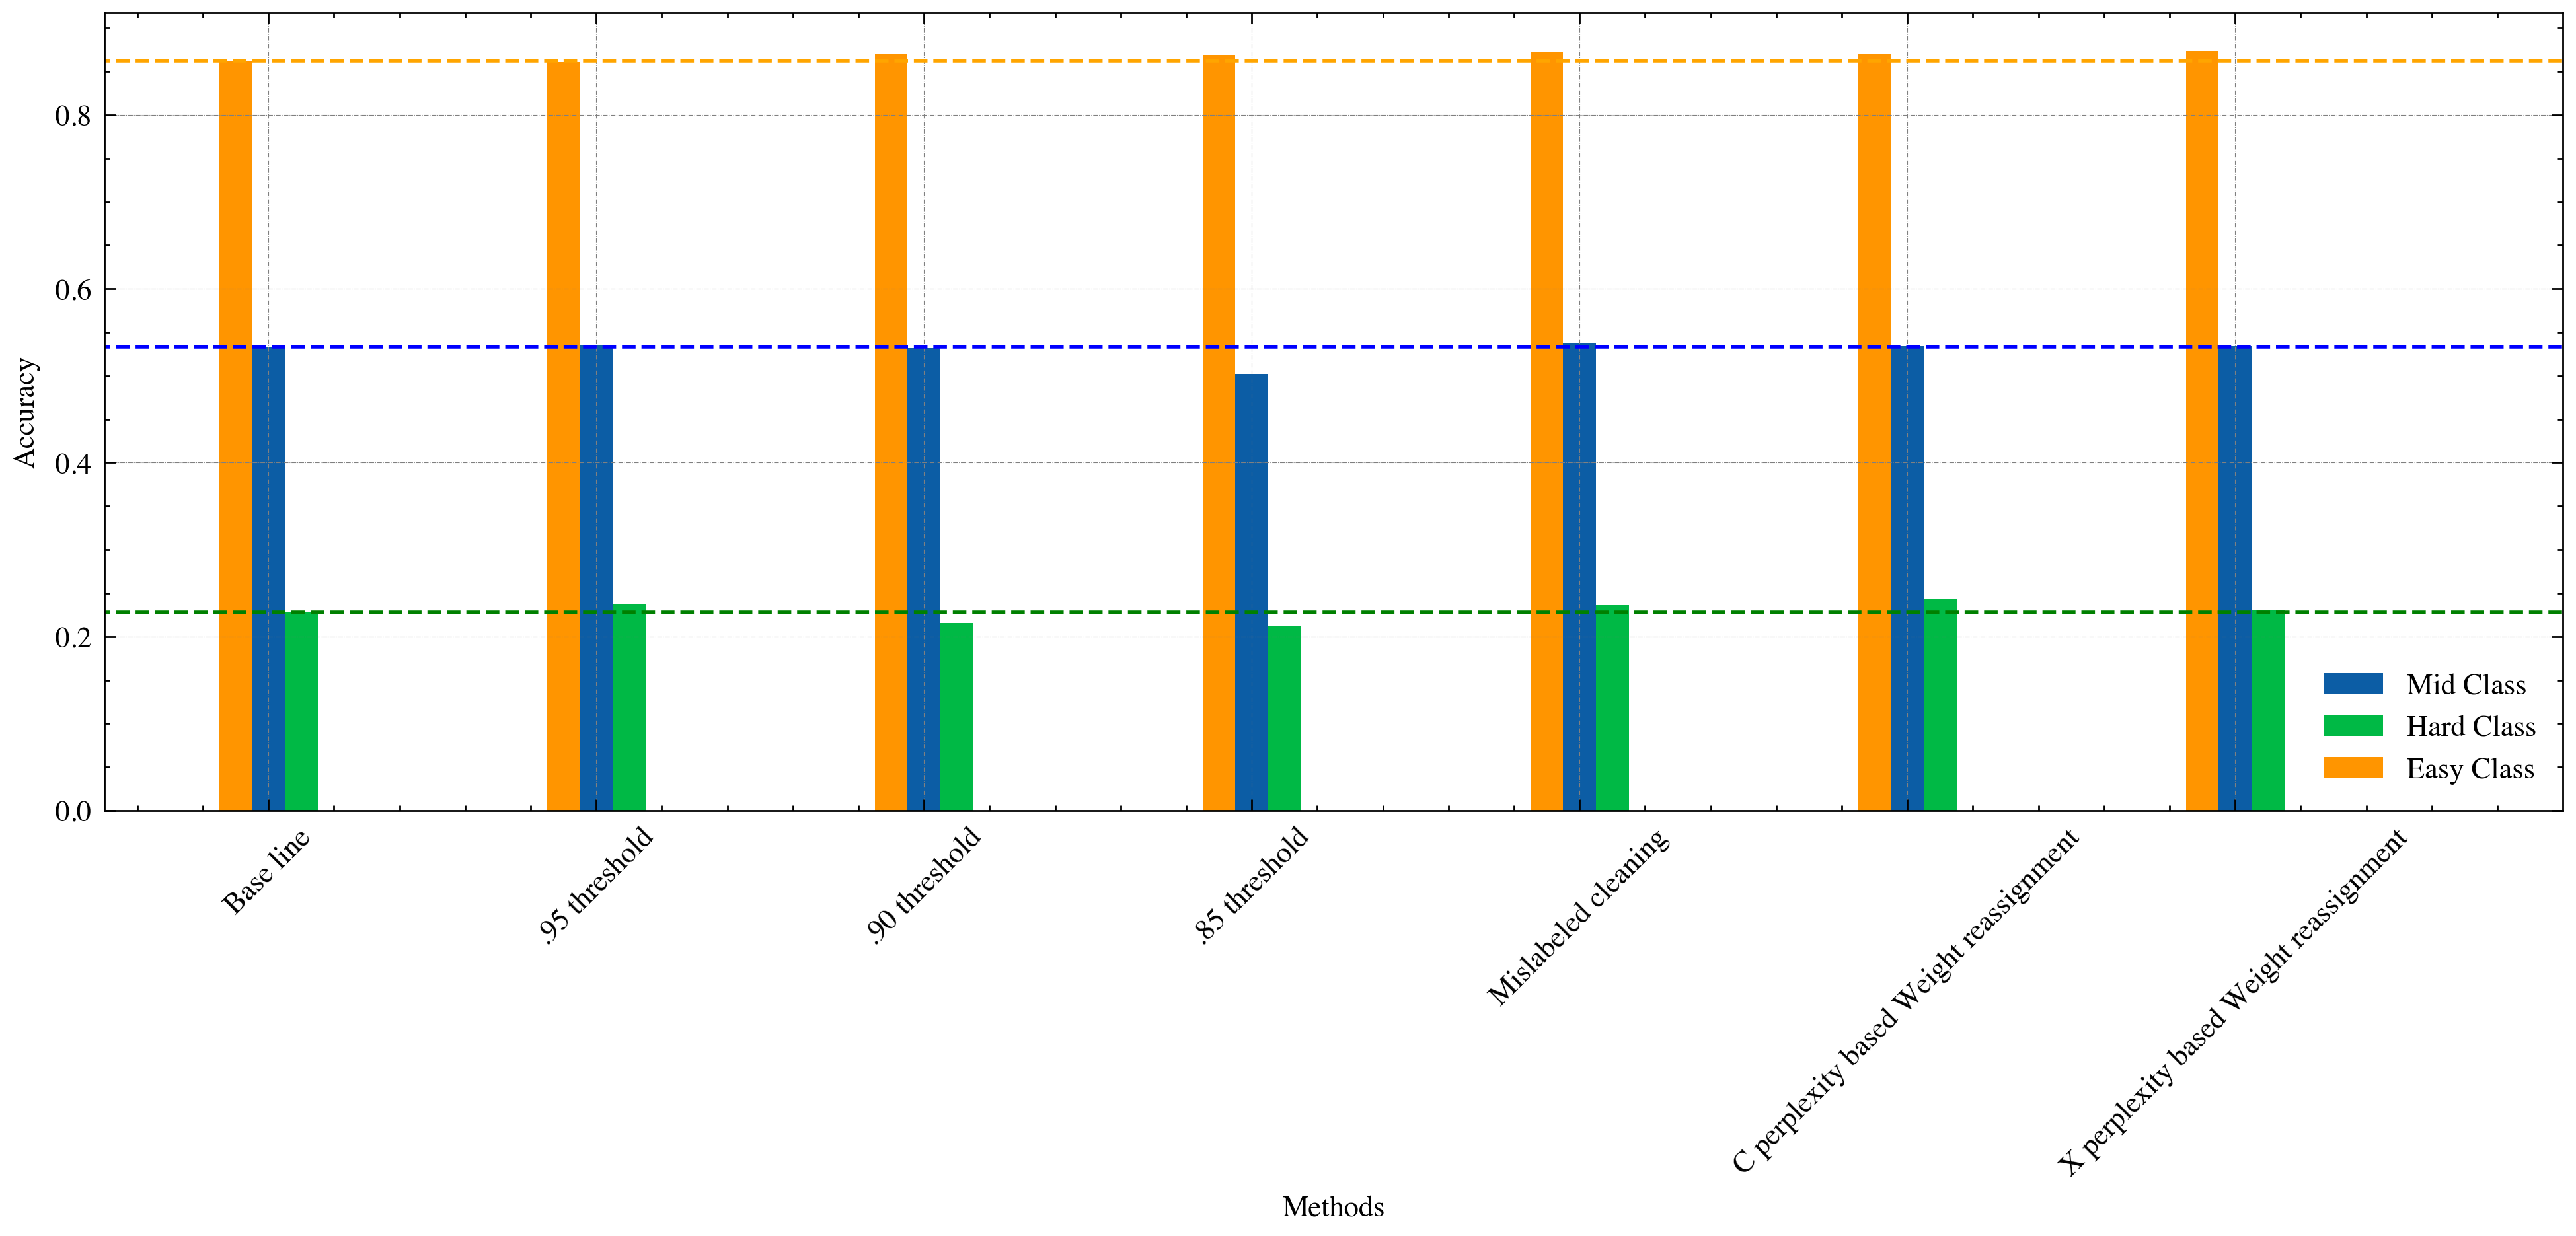

In [39]:
plt.style.use(['science','ieee','std-colors','no-latex'])
fig = plt.figure(figsize=[12,4],dpi=400)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

tick = ['Base line',
 '.95 threshold',
 '.90 threshold',
 '.85 threshold',
 'Mislabeled cleaning',
 'C perplexity based Weight reassignment',
 'X perplexity based Weight reassignment']

bar_width = 0.1

bar_1 = range(7)
bar_2 = [i-bar_width for i in bar_1]
bar_3 = [i+bar_width for i in bar_1]


plt.bar(tick,mid_acc, width=bar_width, label='Mid Class')
plt.bar(bar_3, hard_acc, width=bar_width, label='Hard Class')
plt.bar(bar_2, easy_acc, width=bar_width, label='Easy Class')

plt.plot([-1,0,1,2,3,4,5,6,7],[easy_acc[0]]*9,color='orange',linestyle='--')
plt.plot([-1,0,1,2,3,4,5,6,7],[mid_acc[0]]*9,color='blue',linestyle='--')
plt.plot([-1,0,1,2,3,4,5,6,7],[hard_acc[0]]*9,color='green',linestyle='--')

plt.xlim([-0.5,7])
plt.xticks(rotation=45)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('img/val_class_based.png',dpi=400)

#### Plot prob. bar

In [51]:
easy_img_example = [load_img(
                            'val/'+'n03947888'+'/ILSVRC2012_val_00001111.JPEG', color_mode="rgb", target_size=(224,224)
                        ),
                    load_img(
                            'val/'+'n03947888'+'/ILSVRC2012_val_00032856.JPEG', color_mode="rgb", target_size=(224,224)
                        ),
                    load_img(
                            'val/'+'n03947888'+'/ILSVRC2012_val_00000966.JPEG', color_mode="rgb", target_size=(224,224)
                        )
                   ]

mid_img_example = [load_img(
                            'val/'+'n01978455'+'/ILSVRC2012_val_00006100.JPEG', color_mode="rgb", target_size=(224,224)
                            ),
                    load_img(
                        'val/'+'n01978455'+'/ILSVRC2012_val_00013377.JPEG', color_mode="rgb", target_size=(224,224)
                        ),
                   load_img(
                        'val/'+'n01978455'+'/ILSVRC2012_val_00023840.JPEG', color_mode="rgb", target_size=(224,224)
                        )]

hard_img_example = [load_img(
                            'val/'+'n07930864'+'/ILSVRC2012_val_00039707.JPEG', color_mode="rgb", target_size=(224,224)
                            ),
                    load_img(
                            'val/'+'n07930864'+'/ILSVRC2012_val_00029908.JPEG', color_mode="rgb", target_size=(224,224)
                            ),
                    load_img(
                            'val/'+'n07930864'+'/ILSVRC2012_val_00037077.JPEG', color_mode="rgb", target_size=(224,224)
                            )]
def map_log(x):
    return x * np.log2(x)

def c_perp(prob):
    entropy = -np.sum(np.apply_along_axis(map_log, 0, prob))
    return entropy

easy_prob,mid_prob,hard_prob = [[],[],[]],[[],[],[]],[[],[],[]]
easy_c,mid_c,hard_c = [[],[],[]],[[],[],[]],[[],[],[]]

easy_id = id_label_map[id_label_map['Nums']==easy]['ID'].values[0]
mid_id = id_label_map[id_label_map['Nums']==mid]['ID'].values[0]
hard_id = id_label_map[id_label_map['Nums']==hard]['ID'].values[0]

for i in range(7):
    
    model = load_model('Final_Model/'+folder_path[i]+'/'+os.listdir(model_path+folder_path[i])[0])
    for j in range(3):    
        img = np.array([img_to_array(easy_img_example[j])])/255
        prob = model.predict(img)[0,easy_id]
        cperp = c_perp(model.predict(img))
        easy_prob[j].append(prob)
        easy_c[j].append(cperp)

        img = np.array([img_to_array(mid_img_example[j])])/255
        prob = model.predict(img)[0,mid_id]
        cperp = c_perp(model.predict(img))
        mid_prob[j].append(prob)
        mid_c[j].append(cperp)
        
        img = np.array([img_to_array(hard_img_example[j])])/255
        prob = model.predict(img)[0,hard_id]
        cperp = c_perp(model.predict(img))
        hard_prob[j].append(prob)
        hard_c[j].append(cperp)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


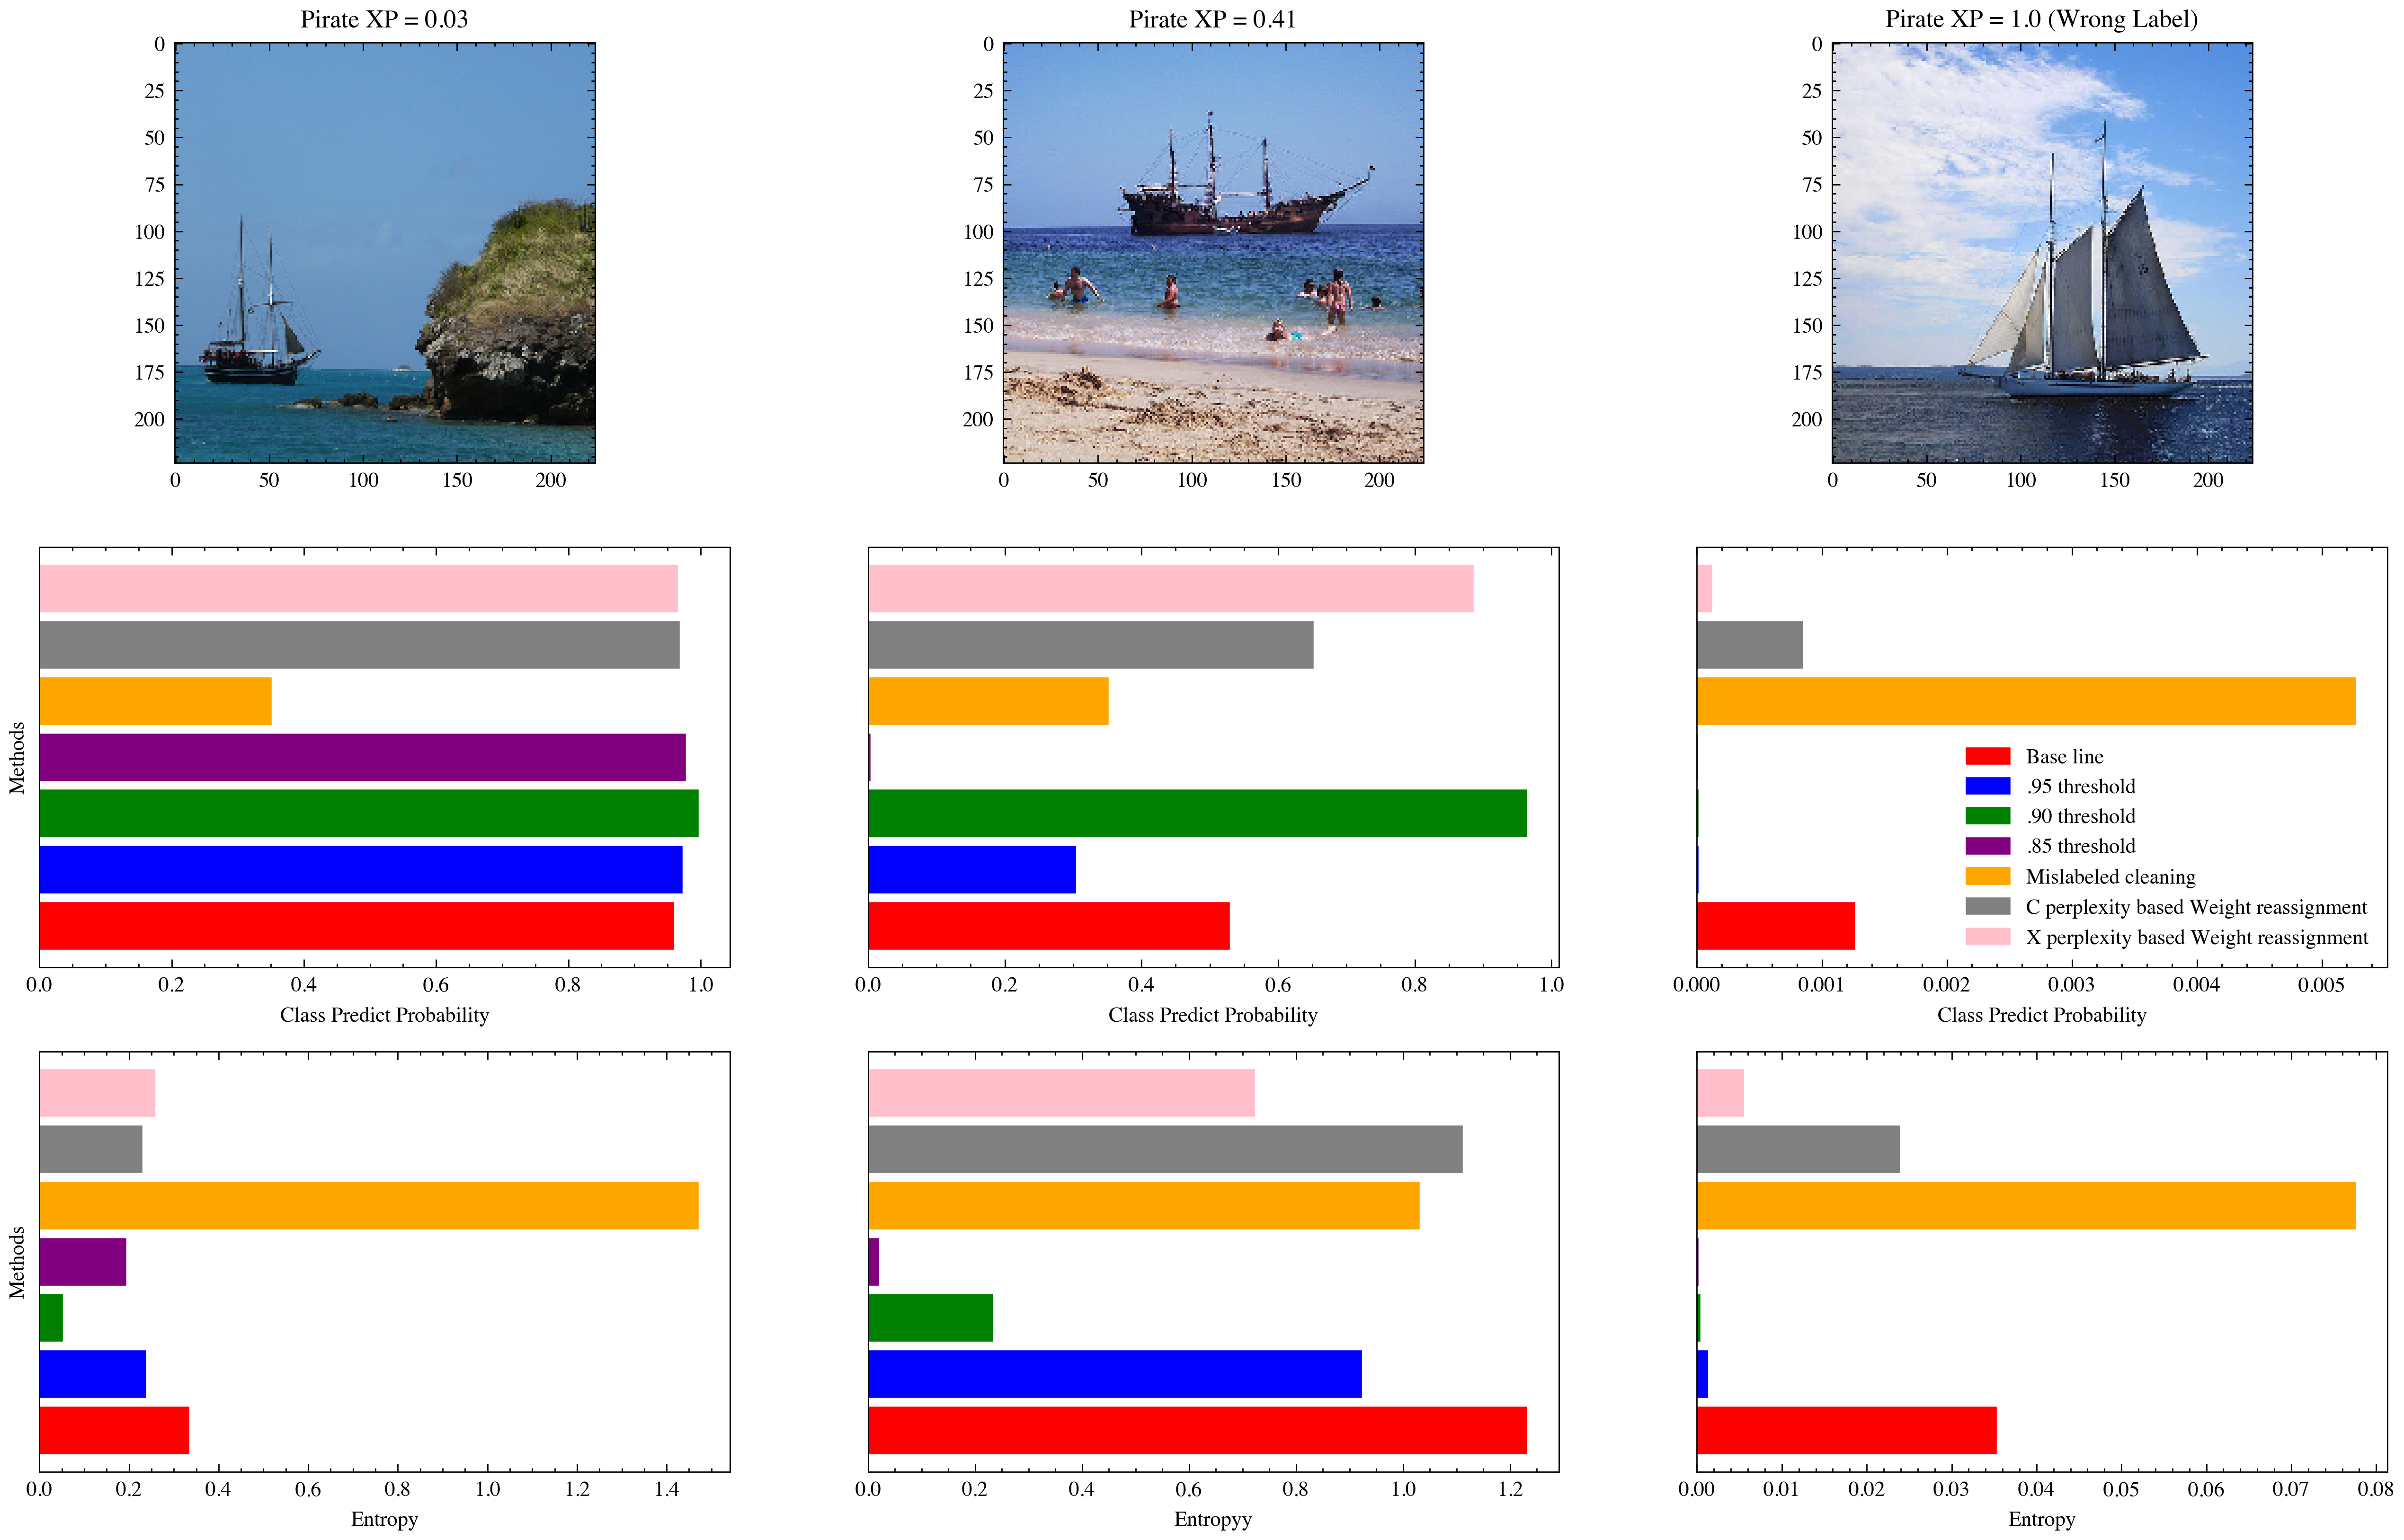

In [52]:
plt.style.use(['science','ieee','std-colors','no-latex'])
fig = plt.figure(figsize=[16,10],dpi=400)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

plt.subplot(3,3,1)
plt.imshow(easy_img_example[0])
plt.title('Pirate XP = 0.03')
plt.subplot(3,3,2)
plt.imshow(easy_img_example[1])
plt.title('Pirate XP = 0.41')
plt.subplot(3,3,3)
plt.imshow(easy_img_example[2])
plt.title('Pirate XP = 1.0 (Wrong Label)')

plt.subplot(3,3,4)
lineObjects = plt.barh(range(7),easy_prob[0])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.ylabel('Methods')
plt.yticks([])

plt.subplot(3,3,5)
lineObjects = plt.barh(range(7),easy_prob[1])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.yticks([])

plt.subplot(3,3,6)
lineObjects = plt.barh(range(7),easy_prob[2])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.legend(iter(lineObjects), tick,loc='lower right')
plt.yticks([])

plt.subplot(3,3,7)
lineObjects = plt.barh(range(7),easy_c[0])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropy')
plt.ylabel('Methods')
plt.yticks([])

plt.subplot(3,3,8)
lineObjects = plt.barh(range(7),easy_c[1])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropyy')
plt.yticks([])

plt.subplot(3,3,9)
lineObjects = plt.barh(range(7),easy_c[2])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropy')
plt.yticks([])

plt.savefig('img/easy_prob.png',dpi=400)

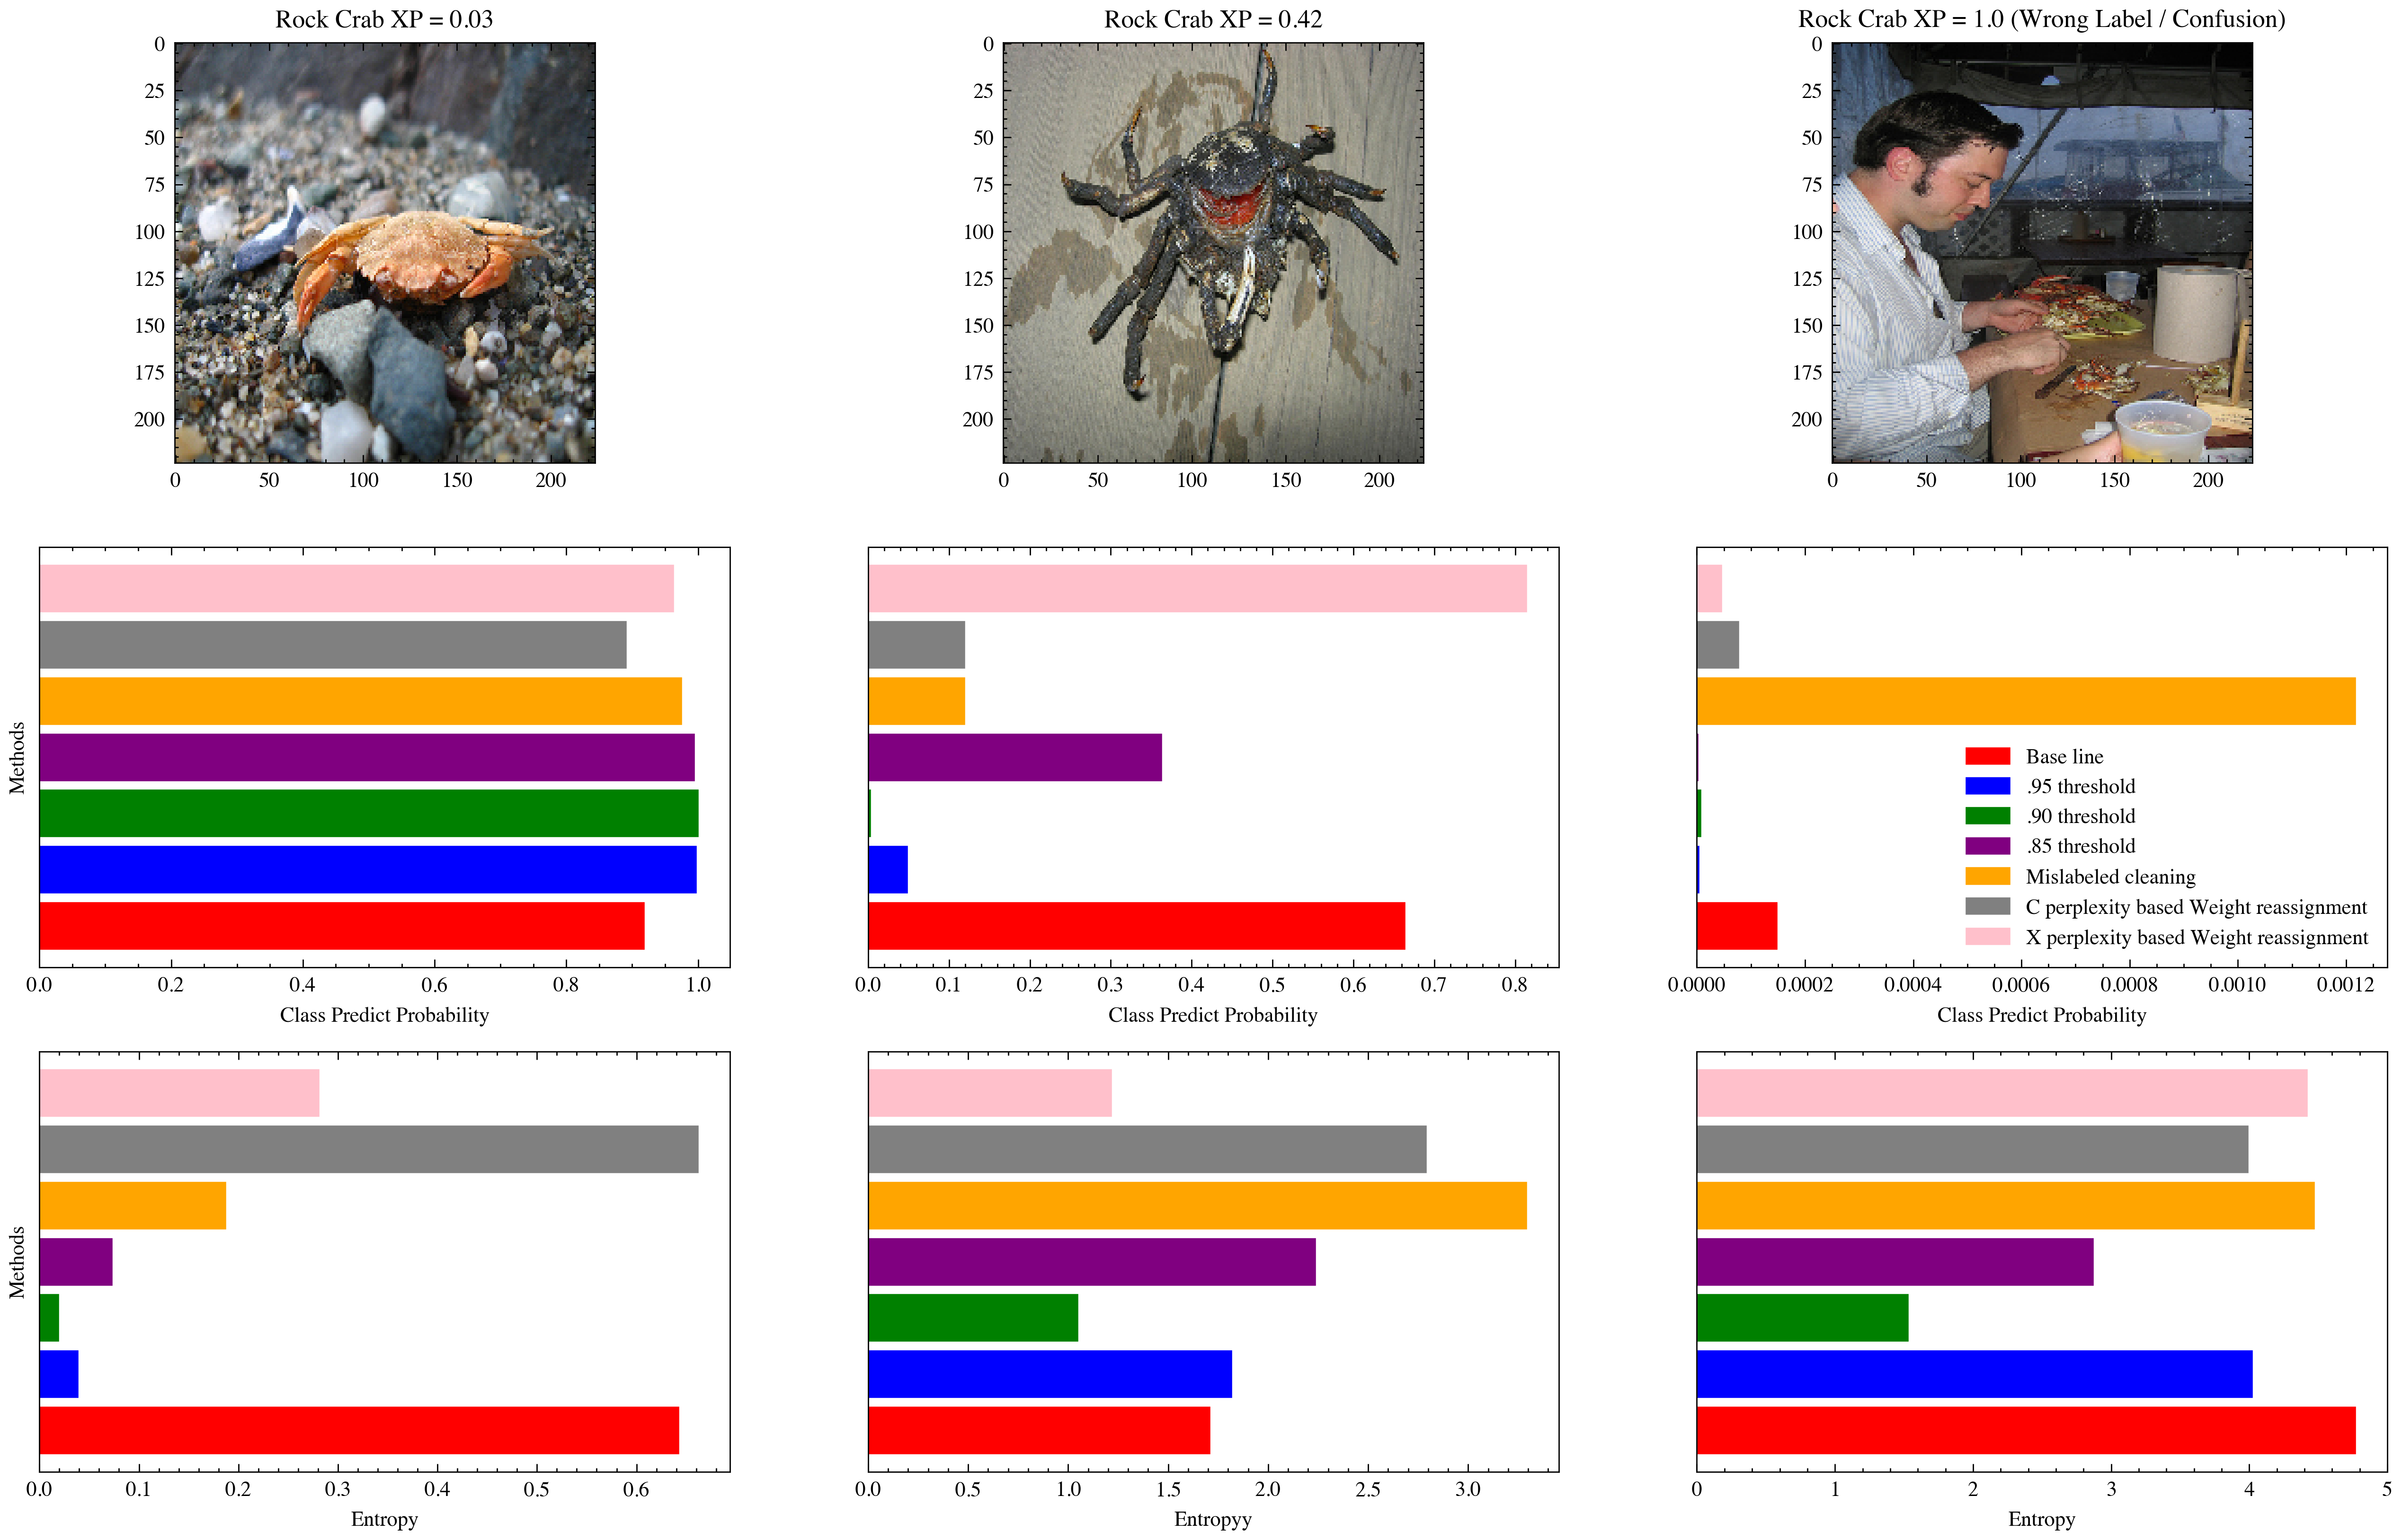

In [53]:
plt.style.use(['science','ieee','std-colors','no-latex'])
fig = plt.figure(figsize=[16,10],dpi=400)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

plt.subplot(3,3,1)
plt.imshow(mid_img_example[0])
plt.title('Rock Crab XP = 0.03')
plt.subplot(3,3,2)
plt.imshow(mid_img_example[1])
plt.title('Rock Crab XP = 0.42')
plt.subplot(3,3,3)
plt.imshow(mid_img_example[2])
plt.title('Rock Crab XP = 1.0 (Wrong Label / Confusion)')

plt.subplot(3,3,4)
lineObjects = plt.barh(range(7),mid_prob[0])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.ylabel('Methods')
plt.yticks([])

plt.subplot(3,3,5)
lineObjects = plt.barh(range(7),mid_prob[1])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.yticks([])

plt.subplot(3,3,6)
lineObjects = plt.barh(range(7),mid_prob[2])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.legend(iter(lineObjects), tick,loc='lower right')
plt.yticks([])

plt.subplot(3,3,7)
lineObjects = plt.barh(range(7),mid_c[0])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropy')
plt.ylabel('Methods')
plt.yticks([])

plt.subplot(3,3,8)
lineObjects = plt.barh(range(7),mid_c[1])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropyy')
plt.yticks([])

plt.subplot(3,3,9)
lineObjects = plt.barh(range(7),mid_c[2])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropy')
plt.yticks([])

plt.savefig('img/mid_prob.png',dpi=400)

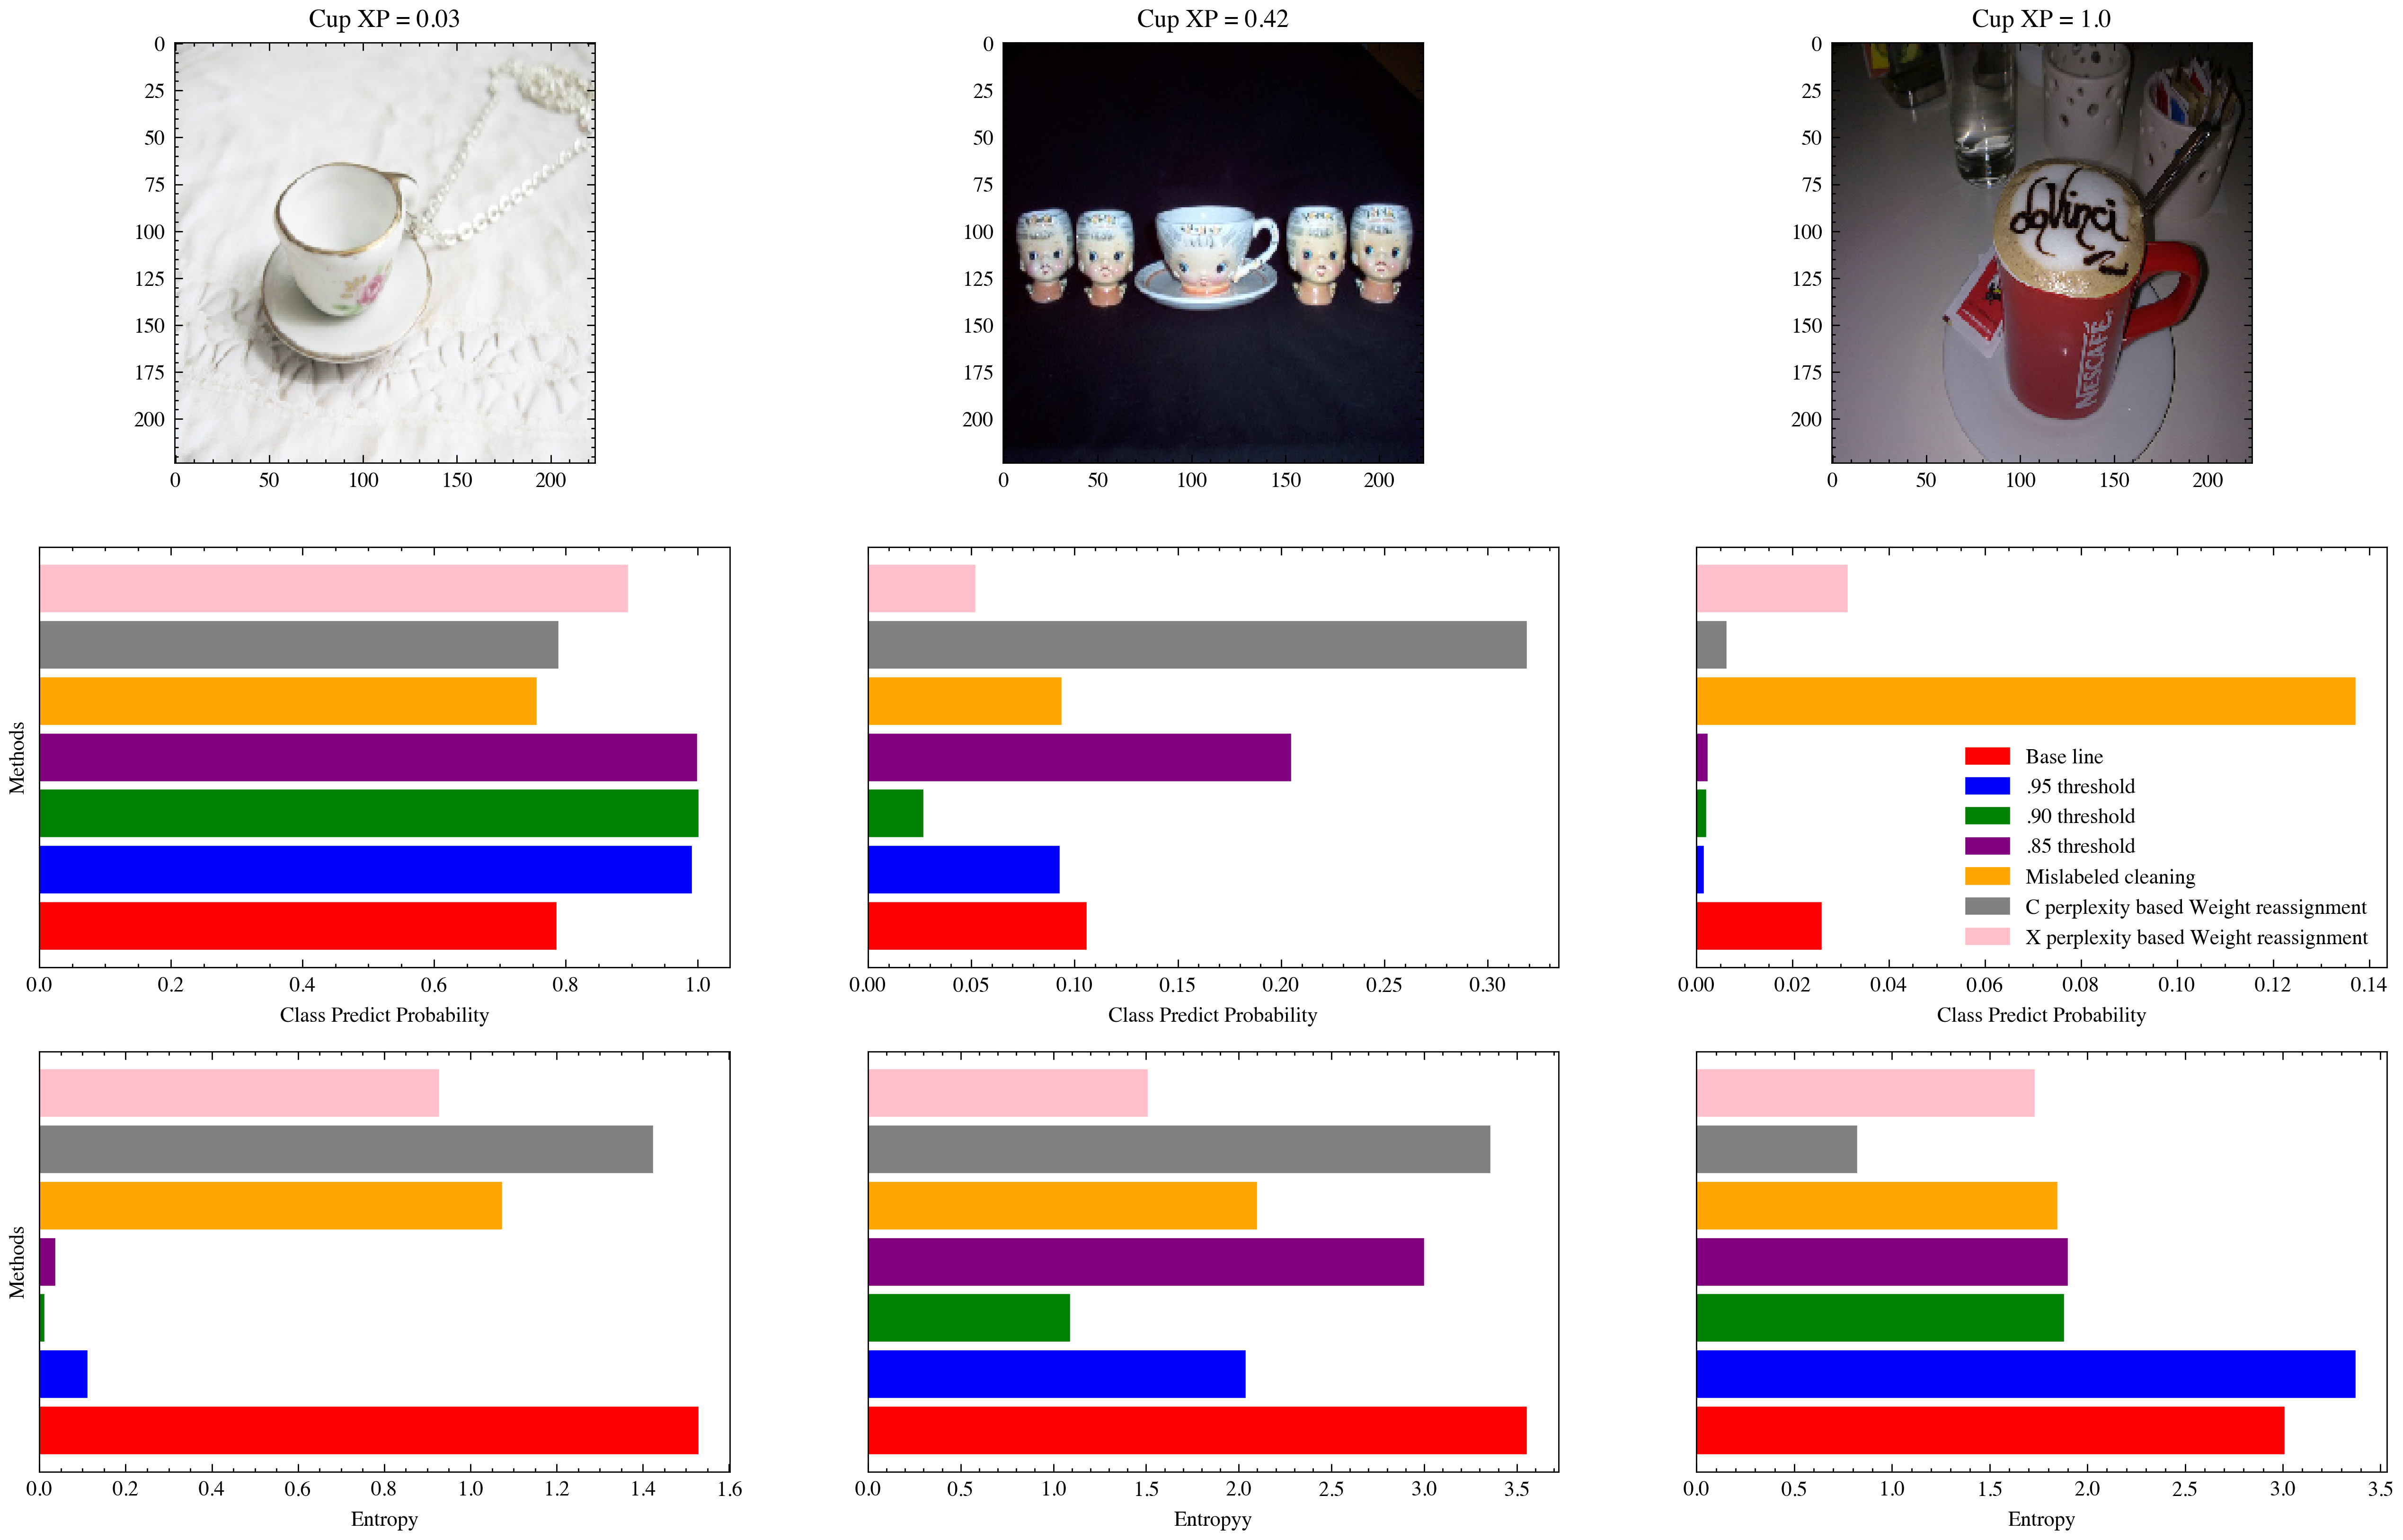

In [54]:
plt.style.use(['science','ieee','std-colors','no-latex'])
fig = plt.figure(figsize=[16,10],dpi=400)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

plt.subplot(3,3,1)
plt.imshow(hard_img_example[0])
plt.title('Cup XP = 0.03')
plt.subplot(3,3,2)
plt.imshow(hard_img_example[1])
plt.title('Cup XP = 0.42')
plt.subplot(3,3,3)
plt.imshow(hard_img_example[2])
plt.title('Cup XP = 1.0')

plt.subplot(3,3,4)
lineObjects = plt.barh(range(7),hard_prob[0])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.ylabel('Methods')
plt.yticks([])

plt.subplot(3,3,5)
lineObjects = plt.barh(range(7),hard_prob[1])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.yticks([])

plt.subplot(3,3,6)
lineObjects = plt.barh(range(7),hard_prob[2])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Class Predict Probability')
plt.legend(iter(lineObjects), tick,loc='lower right')
plt.yticks([])

plt.subplot(3,3,7)
lineObjects = plt.barh(range(7),hard_c[0])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropy')
plt.ylabel('Methods')
plt.yticks([])

plt.subplot(3,3,8)
lineObjects = plt.barh(range(7),hard_c[1])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropyy')
plt.yticks([])

plt.subplot(3,3,9)
lineObjects = plt.barh(range(7),hard_c[2])
lineObjects[0].set_color('r')
lineObjects[1].set_color('blue')
lineObjects[2].set_color('green')
lineObjects[3].set_color('purple')
lineObjects[4].set_color('orange')
lineObjects[5].set_color('grey')
lineObjects[6].set_color('pink')
plt.xlabel('Entropy')
plt.yticks([])

plt.savefig('img/hard_prob.png',dpi=400)

### Predict on given label on VAL II

In [ ]:
easy_acc,mid_acc,hard_acc = [0]*7,[0]*7,[0]*7

easy_img,mid_img,hard_img = [],[],[]

for i in os.listdir('val2/'+easy):
    easy_img.append(np.array([img_to_array(load_img(
                            'val2/'+easy+'/'+i, color_mode="rgb", target_size=(224,224)
                        ))])/255)
    
for i in os.listdir('val2/'+mid):
    mid_img.append(np.array([img_to_array(load_img(
                            'val2/'+mid+'/'+i, color_mode="rgb", target_size=(224,224)
                        ))])/255)
    
for i in os.listdir('val2/'+hard):
    hard_img.append(np.array([img_to_array(load_img(
                            'val2/'+hard+'/'+i, color_mode="rgb", target_size=(224,224)
                        ))])/255)

In [ ]:
model_path = 'Final_Model/'
folder_path = ['Baseline',
 'Pruned95',
 'Pruned90',
 'Pruned85',
 'TVL',
 'C_weight',
 'X_weight']

for i in range(7):
    model = load_model('Final_Model/'+folder_path[i]+'/'+os.listdir(model_path+folder_path[i])[0])
    
    true_pred = 0
    for img in easy_img:
        pred = np.argmax(model.predict(img))
        label = id_label_map[id_label_map['ID'] == pred]['Nums'][pred]
        if label == easy:
            true_pred += 1
    easy_acc[i] = true_pred / 10
    
    true_pred = 0
    for img in mid_img:
        pred = np.argmax(model.predict(img))
        label = id_label_map[id_label_map['ID'] == pred]['Nums'][pred]
        if label == mid:
            true_pred += 1
    mid_acc[i] = true_pred / 10

    true_pred = 0
    for img in hard_img:
        pred = np.argmax(model.predict(img))
        label = id_label_map[id_label_map['ID'] == pred]['Nums'][pred]
        if label == hard:
            true_pred += 1
    hard_acc[i] = true_pred / 10

In [ ]:
plt.style.use(['science','ieee','std-colors','no-latex'])
fig = plt.figure(figsize=[12,4],dpi=400)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

tick = ['Base line',
 '.95 threshold',
 '.90 threshold',
 '.85 threshold',
 'Mislabeled cleaning',
 'C perplexity based Weight reassignment',
 'X perplexity based Weight reassignment']

bar_width = 0.1

bar_1 = range(7)
bar_2 = [i-bar_width for i in bar_1]
bar_3 = [i+bar_width for i in bar_1]


plt.bar(tick,mid_acc, width=bar_width, label='Mid Class')
plt.bar(bar_3, hard_acc, width=bar_width, label='Hard Class')
plt.bar(bar_2, easy_acc, width=bar_width, label='Easy Class')

plt.plot([-1,0,1,2,3,4,5,6,7],[easy_acc[0]]*9,color='orange',linestyle='--')
plt.plot([-1,0,1,2,3,4,5,6,7],[mid_acc[0]]*9,color='blue',linestyle='--')
plt.plot([-1,0,1,2,3,4,5,6,7],[hard_acc[0]]*9,color='green',linestyle='--')

plt.xlim([-0.5,7])
plt.xticks(rotation=45)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('img/val2_class_based.png',dpi=400)

#### Plot distribution

In [4]:
val1_datagen = ImageDataGenerator(rescale=1./255)

val1_generator = val1_datagen.flow_from_directory(
                                'val/',
                                target_size=(224,224),
                                batch_size=1,
                                shuffle=False)
val2_datagen = ImageDataGenerator(rescale=1./255)

val2_generator = val2_datagen.flow_from_directory(
                                'val2/',
                                target_size=(224,224),
                                batch_size=1,
                                shuffle=False)

Found 50070 images belonging to 1000 classes.
Found 10000 images belonging to 1000 classes.


In [15]:
model_path = 'Final_Model/'
folder_path = ['Baseline',
 'Pruned95',
 'Pruned90',
 'Pruned85',
 'TVL',
 'C_weight',
 'X_weight']

ps_val2 = []
for i in range(7):
    model = load_model('Final_Model/'+folder_path[i]+'/'+os.listdir(model_path+folder_path[i])[0])
    
    val2_predict = model.predict(val2_generator,verbose=1)
    val2_label = np.argmax(val2_predict,axis=1)
    cr2 = classification_report(val2_generator.classes,val2_label,output_dict=True)
    dic2 = [[key,cr2[key]['precision']] for key in list(cr2.keys())[0:1000]]
    dic2.sort(key=lambda x:x[1],reverse=True)
    dic2 = np.array(dic2,dtype='float')
    ps_val2.append(dic2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10000/10000 [==============================] - 122s 12ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10000/10000 [==============================] - 119s 12ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10000/10000 [==============================] - 118s 12ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10000/10000 [==============================] - 112s 11ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10000/10000 [==============================] - 111s 11ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10000/10000 [==============================] - 112s 11ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10000/10000 [==============================] - 113s 11ms/step


0.1032040365517226
0.1424002262750057
0.15862094793700404
0.033672671817349537
0.1206026866192974
0.022536859964291056
0.04448675950547402


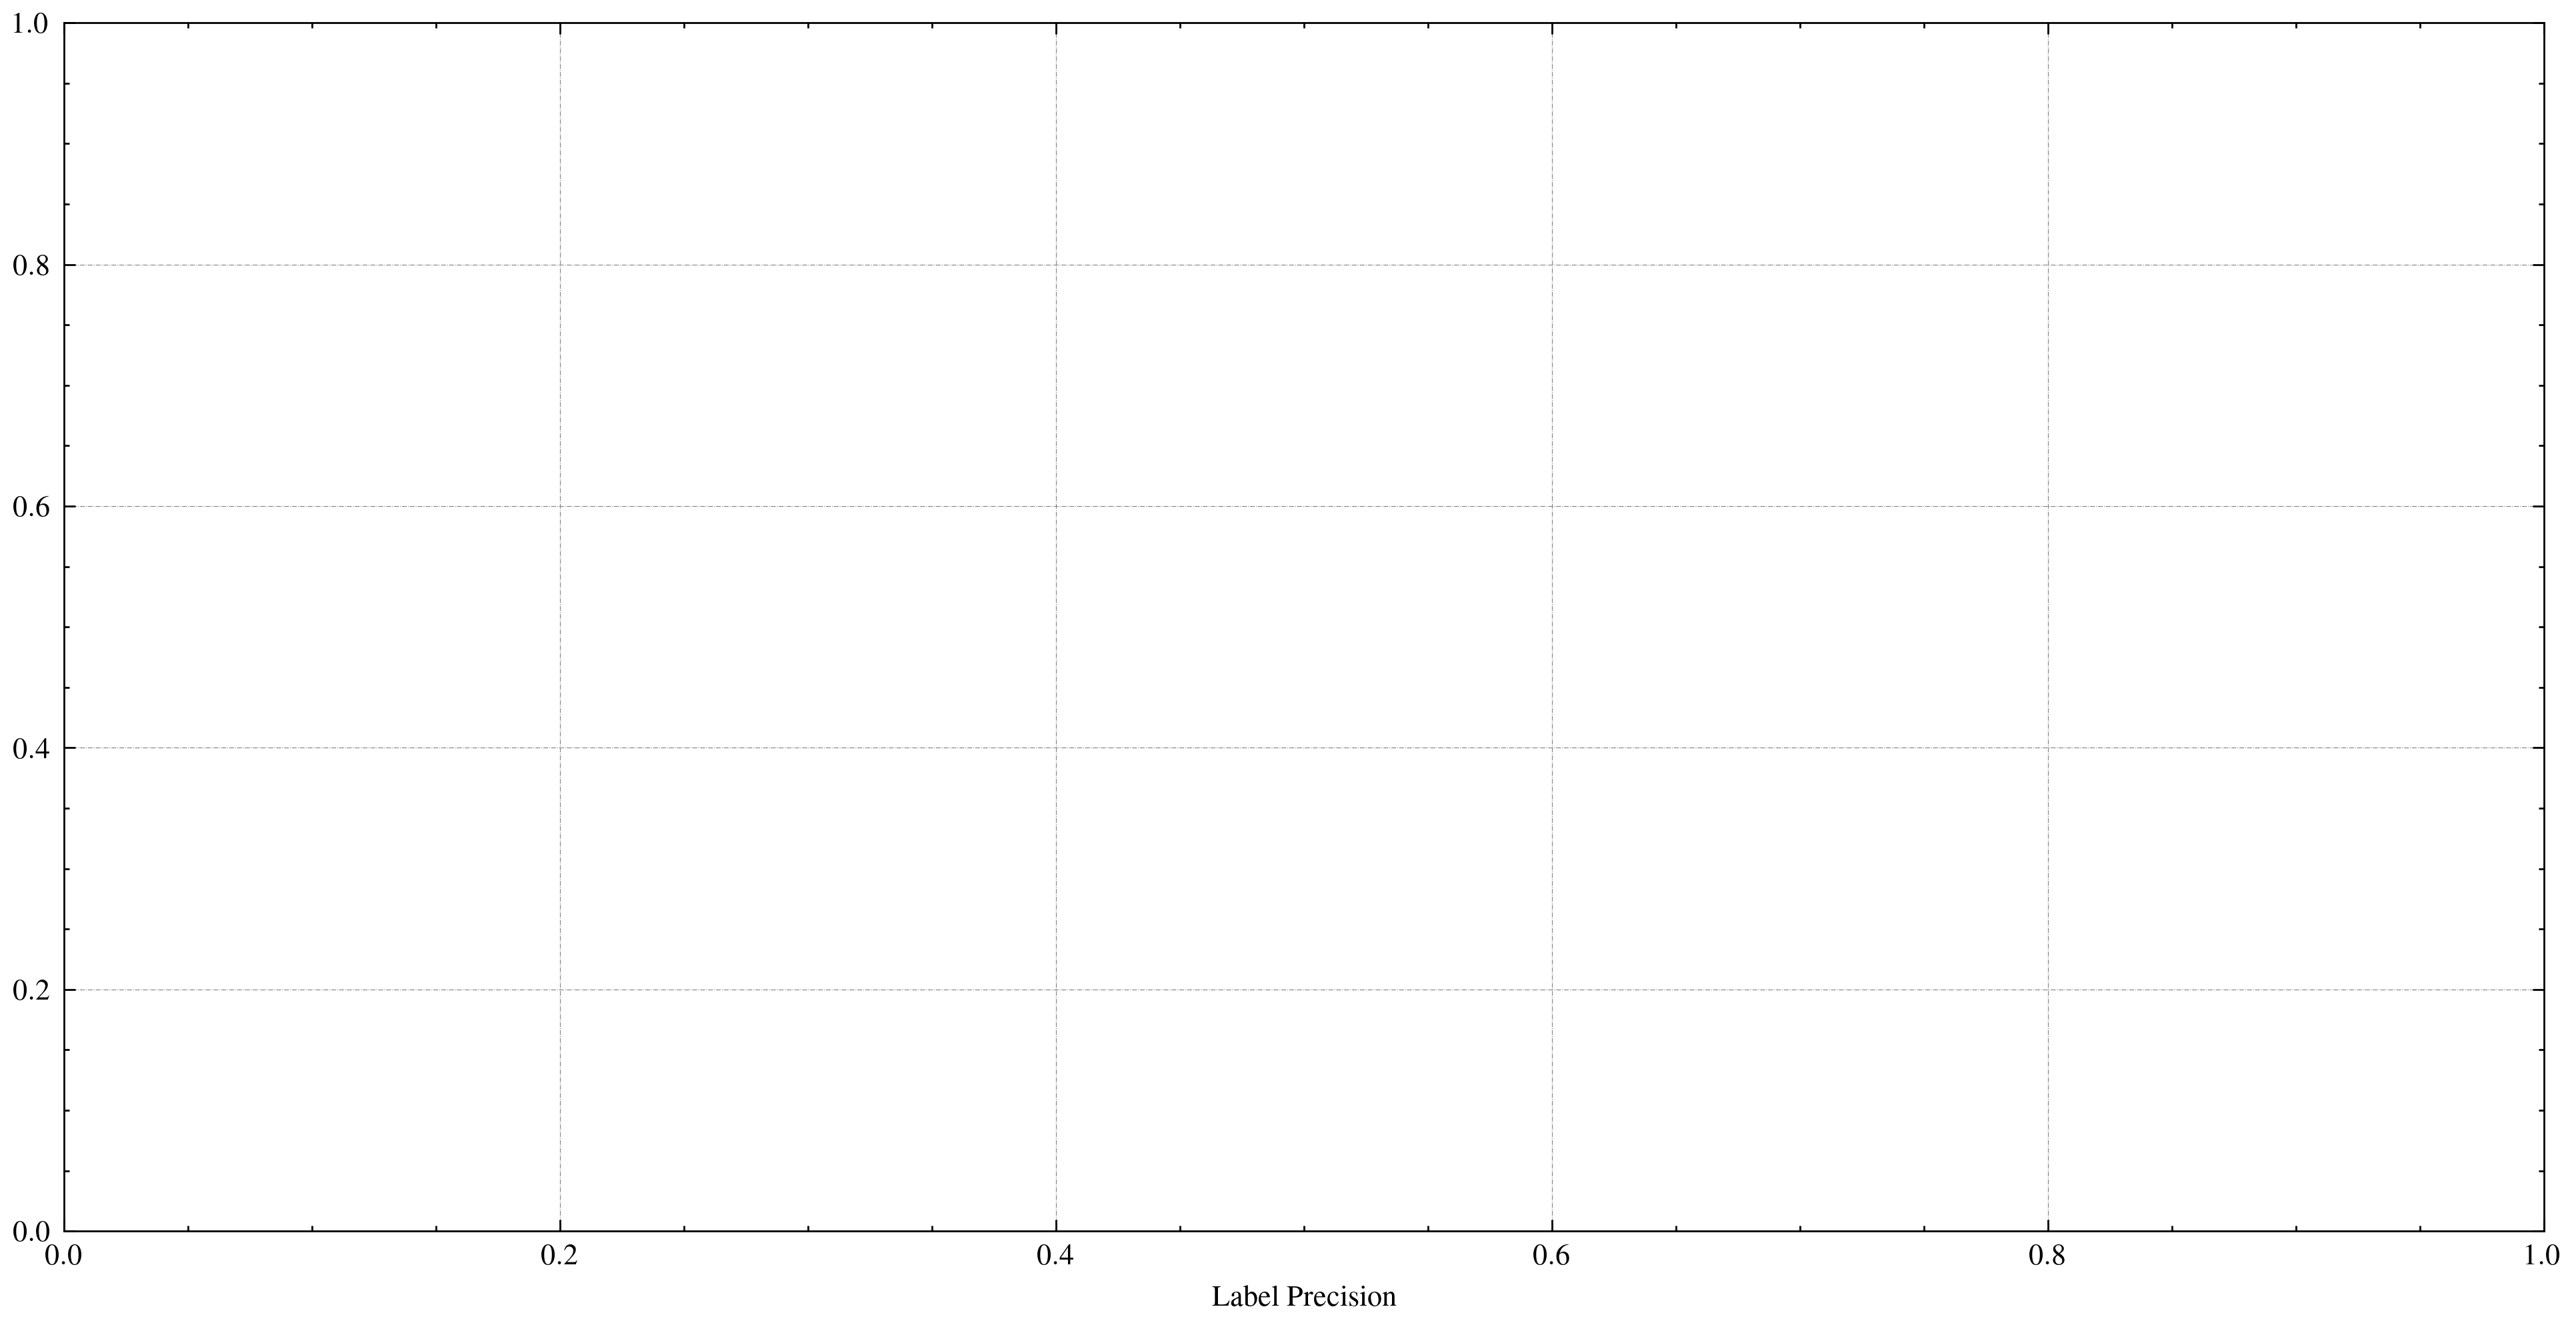

In [32]:
plt.style.use(['science','ieee','std-colors'])
fig = plt.figure(figsize=[12,6],dpi=400)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)
tick = ['Base line',
 '.95 threshold',
 '.90 threshold',
 '.85 threshold',
 'Mislabeled cleaning',
 'C perplexity based Weight reassignment',
 'X perplexity based Weight reassignment']

for i in range(7):
    # sns.kdeplot(ps_val2[i][:,1],bw=.001,label = tick[i] )
    print(skew(ps_val2[i][:,1]))
plt.xlabel('Label Precision')
plt.legend()

plt.savefig('img/displot_val2.png',dpi=400)

In [ ]:
val1_predict = model.predict(val1_generator,verbose=1)

In [ ]:
val1_predict = model.predict(val1_generator,verbose=1)
val1_label = np.argmax(val1_predict,axis=1)
cr1 = classification_report(val1_generator.classes,val1_label,output_dict=True)

In [ ]:
val1_predict_95 = model.predict(val1_generator,verbose=1)
val1_label_95 = np.argmax(val1_predict_95,axis=1)
cr1_95 = classification_report(val1_generator.classes,val1_label_95,output_dict=True)

In [ ]:
dic1 = [[key,cr1[key]['precision']] for key in list(cr1.keys())[0:1000]]
dic1.sort(key=lambda x:x[1],reverse=True)
dic1 = np.array(dic1,dtype='float')

In [ ]:
dic1_95 = [[key,cr1_95[key]['precision']] for key in list(cr1_95.keys())[0:1000]]
dic1_95 = np.array(dic1_95,dtype='float')

In [ ]:
plt.style.use(['science','ieee','std-colors'])
fig = plt.figure(figsize=[10,4],dpi=200)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)
plt.subplot(1,2,1)
sns.distplot(dic1[:,1],bins=30,kde=True,color='b',label='Baseline Val I',hist_kws={"linewidth":0.8,"linestyle":'-.'})
plt.legend()
plt.xlabel('Label Precision')
plt.subplot(1,2,2)
sns.distplot(dic1_95[:,1],bins=30,kde=True,color='r',label='.95 Threshold Val I',hist_kws={"linewidth":0.8,"linestyle":'-.'})
plt.xlabel('Label Precision')
plt.legend()
plt.savefig('displot_val.png',dpi=200)

In [ ]:
val2_predict = model.predict(val2_generator,verbose=1)
val2_label = np.argmax(val2_predict,axis=1)
cr2 = classification_report(val2_generator.classes,val2_label,output_dict=True)

In [ ]:
val2_predict_95 = model.predict(val2_generator,verbose=1)
val2_label_95 = np.argmax(val2_predict_95,axis=1)
cr2_95 = classification_report(val2_generator.classes,val2_label,output_dict=True)

In [ ]:
dic2 = [[key,cr2[key]['precision']] for key in list(cr2.keys())[0:1000]]
dic2.sort(key=lambda x:x[1],reverse=True)
dic2 = np.array(dic2,dtype='float')

In [ ]:
dic2_95 = [[key,cr2_95[key]['precision']] for key in list(cr2_95.keys())[0:1000]]
dic2_95.sort(key=lambda x:x[1],reverse=True)
dic2_95 = np.array(dic2_95,dtype='float')

In [ ]:
plt.style.use(['science','ieee','std-colors'])
fig = plt.figure(figsize=[10,4],dpi=200)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)
plt.subplot(1,2,1)
sns.distplot(dic2[:,1],bins=30,kde=True,color='green',label='Baseline Val II',hist_kws={"linewidth":0.8,"linestyle":'-.'})
plt.legend()
plt.xlabel('Label Precision')
plt.subplot(1,2,2)
sns.distplot(dic2_95[:,1],bins=30,kde=True,color='orange',label='.95 Threshold Val II',hist_kws={"linewidth":0.8,"linestyle":'-.'})
plt.xlabel('Label Precision')
plt.legend()
plt.savefig('displot_val2.png',dpi=200)